In [5]:
import pandas as pd
import io
import tensorflow as ts
import nltk
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
import joblib
#from google.colab import files
from keras.layers import *
from keras.models import Model, Sequential
from keras.preprocessing.text import Tokenizer 
from keras.utils import pad_sequences
from sklearn.preprocessing import StandardScaler #Standardize function
from sklearn.preprocessing import MinMaxScaler #Normalize function
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
df = pd.read_excel(r'C:\Users\taquo\name.xlsx') #Import uploaded into dataframe

In [4]:
print(df.head())

         FM_NAME  GENDER
0        mẫn nhi       0
1        mai chi       0
2  ngọc kiều anh       0
3  thị minh hiếu       0
4      diệu linh       0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804210 entries, 0 to 804209
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   FM_NAME  804209 non-null  object
 1   GENDER   804210 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 12.3+ MB


In [6]:
df['GENDER'].value_counts()

1    490352
0    313858
Name: GENDER, dtype: int64

In [7]:
df['FM_NAME'] = df['FM_NAME'].str.lower()
name_arr = pd.array(df['FM_NAME'])
name_arr

<PandasArray>
[        'mẫn nhi',         'mai chi',   'ngọc kiều anh',   'thị minh hiếu',
       'diệu linh', 'thị phương thảo', 'hoàng linh ngọc',  'thị tuyết ngân',
 'thị quỳnh trang',    'thị mỹ duyên',
 ...
        'tuấn anh',       'văn hoàng',        'sơn tùng',      'quang hùng',
        'đình tài',        'hữu nhân',        'hồng sơn',      'văn nguyện',
       'huy dương',          'văn tú']
Length: 804210, dtype: object

In [8]:
embedding_dim = 3
voc_size = 10000
max_len = 5

In [9]:
name_arr

<PandasArray>
[        'mẫn nhi',         'mai chi',   'ngọc kiều anh',   'thị minh hiếu',
       'diệu linh', 'thị phương thảo', 'hoàng linh ngọc',  'thị tuyết ngân',
 'thị quỳnh trang',    'thị mỹ duyên',
 ...
        'tuấn anh',       'văn hoàng',        'sơn tùng',      'quang hùng',
        'đình tài',        'hữu nhân',        'hồng sơn',      'văn nguyện',
       'huy dương',          'văn tú']
Length: 804210, dtype: object

In [9]:
tokenizer = Tokenizer(num_words = voc_size, oov_token = "<OOV>")
tokenizer.fit_on_texts(name_arr[0:600000])
word_index =tokenizer.word_index
len(word_index)

6637

In [11]:
wordtovec_name_arr = tokenizer.texts_to_sequences(name_arr[0:600000])

In [12]:
wordtovec_df = pd.DataFrame(pad_sequences(wordtovec_name_arr, maxlen = max_len, truncating = 'post', padding = 'post'))
wordtovec_df  = pd.DataFrame(wordtovec_df)
#wordtovec_df .columns = ["Val", "Val1", "Val2"]
wordtovec_df ['GENDER'] = df['GENDER'][0:600000]
wordtovec_df.head()

,0,1,2,3,4,GENDER
0,258,55,0,0,0,0
1,31,100,0,0,0,0
2,4,68,6,0,0,0
3,2,7,43,0,0,0
4,113,12,0,0,0,0


In [13]:
X = wordtovec_df.iloc[:,[0,1,2,3,4]]
y=wordtovec_df['GENDER']
# using the train test split function
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=104, test_size=0.25,shuffle=True)

In [14]:
model = Sequential()
model.add(Embedding(voc_size, embedding_dim, input_length = max_len))
model.add(Flatten())
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 3)              30000     
                                                                 
 flatten (Flatten)           (None, 15)                0         
                                                                 
 dense (Dense)               (None, 10)                160       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 30,171
Trainable params: 30,171
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
14063/14063 [==============================] - 63s 5ms/step - loss: 0.0711 - acc: 0.9735 - val_loss: 0.0766 - val_acc: 0.9709
Epoch 2/10
14063/14063 [==============================] - 62s 4ms/step - loss: 0.0708 - acc: 0.9737 - val_loss: 0.0761 - val_acc: 0.9712
Epoch 3/10
14063/14063 [==============================] - 65s 5ms/step - loss: 0.0706 - acc: 0.9737 - val_loss: 0.0764 - val_acc: 0.9709
Epoch 4/10
14063/14063 [==============================] - 80s 6ms/step - loss: 0.0704 - acc: 0.9738 - val_loss: 0.0764 - val_acc: 0.9711
Epoch 5/10
14063/14063 [==============================] - 69s 5ms/step - loss: 0.0703 - acc: 0.9738 - val_loss: 0.0767 - val_acc: 0.9707
Epoch 6/10
14063/14063 [==============================] - 68s 5ms/step - loss: 0.0700 - acc: 0.9739 - val_loss: 0.0760 - val_acc: 0.9712
Epoch 7/10
14063/14063 [==============================] - 66s 5ms/step - loss: 0.0699 - acc: 0.9740 - val_loss: 0.0765 - val_acc: 0.9710
Epoch 8/10
14063/14063 [=================

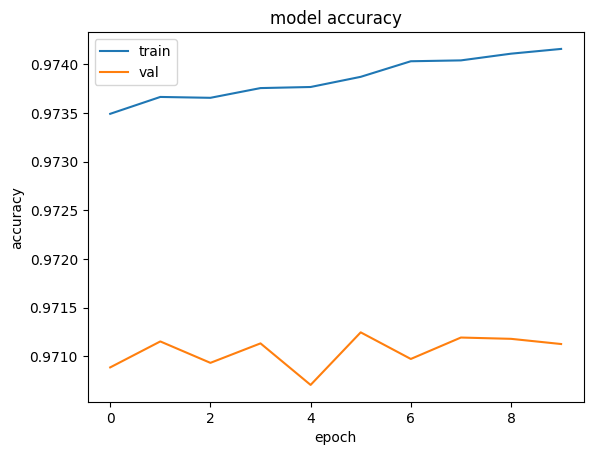

In [24]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

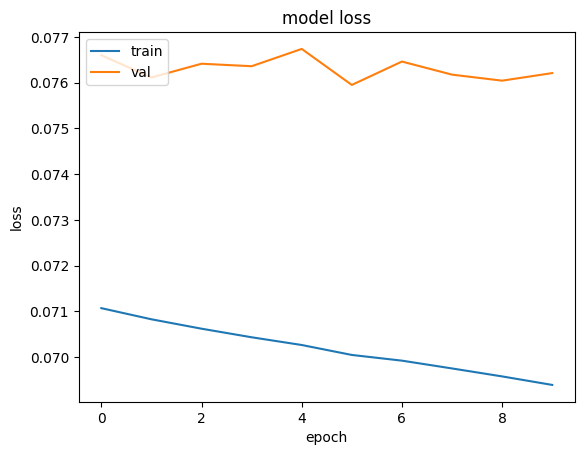

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
from matplotlib import pyplot as plt

In [43]:
# Savin the model as a pickle in a file
joblib.dump(model, 'gender_predict_by_name_model.pkl')
import pickle
# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
# Read model from *pkl file   
model = joblib.load('gender_predict_by_name_model.pkl')

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-01-24 12:54:50         1913
metadata.json                                  2023-01-24 12:54:50           64
variables.h5                                   2023-01-24 12:54:50       386232
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\embedding
......vars
.........0
...layers\flatten
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars


In [44]:
def predict_gender_by_name(name):
  embedding_dim = 3
  voc_size = 10000
  max_len = 5
  wordtovec_test= tokenizer.texts_to_sequences([name])
  wordtovec_test = pd.DataFrame(pad_sequences(wordtovec_test, maxlen = max_len, truncating = 'post', padding = 'post'))
  wordtovec_test
  result = model.predict(wordtovec_test)
  if (result < 0.5):
    print("Gender of name is: Female ( Output level: ", result*100, ")")
  else :
    print("Gender of name is: Male ( Output level: ", result*100,")")


In [11]:
predict_gender_by_name("Khánh Tạ")

NameError: name 'predict_gender_by_name' is not defined